# Импорт

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import xgboost
from pandas import read_csv, DataFrame
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from xgboost import XGBClassifier

# Импорт данных и просмотр данных

In [66]:
datasetN = read_csv('train.csv')
datasetN.head()

0           1           2           3          4           5  \
0 -220.530530  -70.197440  119.035181   20.711737  -6.152986   52.225051   
1   -8.536541   -8.305435 -117.828269  -28.588333  14.223240  -42.087807   
2  126.229973  133.463504 -105.511797 -149.110267  -3.673355 -104.302244   
3  369.571563   11.850181 -299.969407   29.371721  -3.457523 -115.901854   
4  -99.563708  -85.166292  -73.363391  -35.357907   5.437025  -54.892519   

            6           7           8         9  ...         20          21  \
0  -23.230903 -166.521871  -41.571463  2.620401  ...  16.936420   46.543585   
1  -45.538664   58.898976   27.749744  2.545916  ...  57.027508  121.304258   
2    5.815395  100.838385  -46.240211  0.141700  ...   4.819849   88.905713   
3  159.134323 -149.741411 -108.847522  0.078277  ...  80.930568 -166.476192   
4   56.430532  -49.237377  -50.054608  2.586612  ...  31.682235  209.163125   

          22          23          24        25        26          27  \
0 -80.962171 -146.652218   10.899085  4.370985  4.060272   40.680890   
1  31.507396   88.282912   66.766185 -4.363974 -5.791376  -32.101939   
2  51.475105  -73.257358  108.947287  8.567240  0.116269 -117.205053   
3 -73.882682  108.222355   19.573192 -2.242024  0.515601  -25.218215   
4 -22.847302  -62.067337   58.109167  2.862082  0.920341 -132.875142   

           28         29  
0  -37.942655  33.838225  
1  -52.255449  -4.826111  
2 -107.835928 -93.990332  
3  121.674228 -16.877368  
4    3.492953 -15.799596  

[5 rows x 30 columns]

In [67]:
y = read_csv('train-target.csv')
y.head()

y
0  1
1  1
2  0
3  0
4  1

In [68]:
test = read_csv('test.csv')
test.head()

0           1           2           3         4          5  \
0  394.650101 -102.778703  -48.854416   17.463193  4.744214 -90.504260   
1   62.200701 -139.323500  235.644493   10.860594  1.921110  39.088440   
2  232.736729    5.502143  204.738165   45.738959  1.338264  33.604743   
3  340.045437 -129.924115   62.694027   61.899097 -1.294288 -58.616589   
4  -60.576957   71.958472  489.203093  121.380719 -3.620431  44.666983   

            6           7           8         9  ...         20          21  \
0  135.111157  -27.691507  192.961067  1.755201  ... -56.947165  140.952506   
1 -186.024836  -53.158605 -122.290561  1.426944  ... -45.854744 -148.360929   
2   92.235943 -115.127927  -95.263085  2.048801  ... -15.638165 -234.606490   
3  -55.080664   10.115134    9.051856  2.732693  ...  13.407883  -56.332212   
4 -161.487192  137.920737  540.680255  1.172919  ... -51.559846   -6.645415   

         22          23          24         25        26          27  \
0  1.885744   11.483086 -131.665132  12.876561  0.156747 -185.849095   
1  2.614495  -24.895114  -40.050598   7.376349  1.962719 -123.776910   
2  0.409558  286.011182   48.109151  -9.277772  1.838195   19.461847   
3  2.801811   70.875892   26.673509   2.389621  2.188665  109.700845   
4  1.889414  -21.814728  -91.701674  -9.206418  1.211916  -11.602746   

           28          29  
0  -29.314711  -84.254441  
1   65.756136  -10.378203  
2  126.144518 -121.300353  
3  109.378365  -58.425305  
4   -8.162451  -87.902970  

[5 rows x 30 columns]

# Посмотрим на парные корреляции между переменными

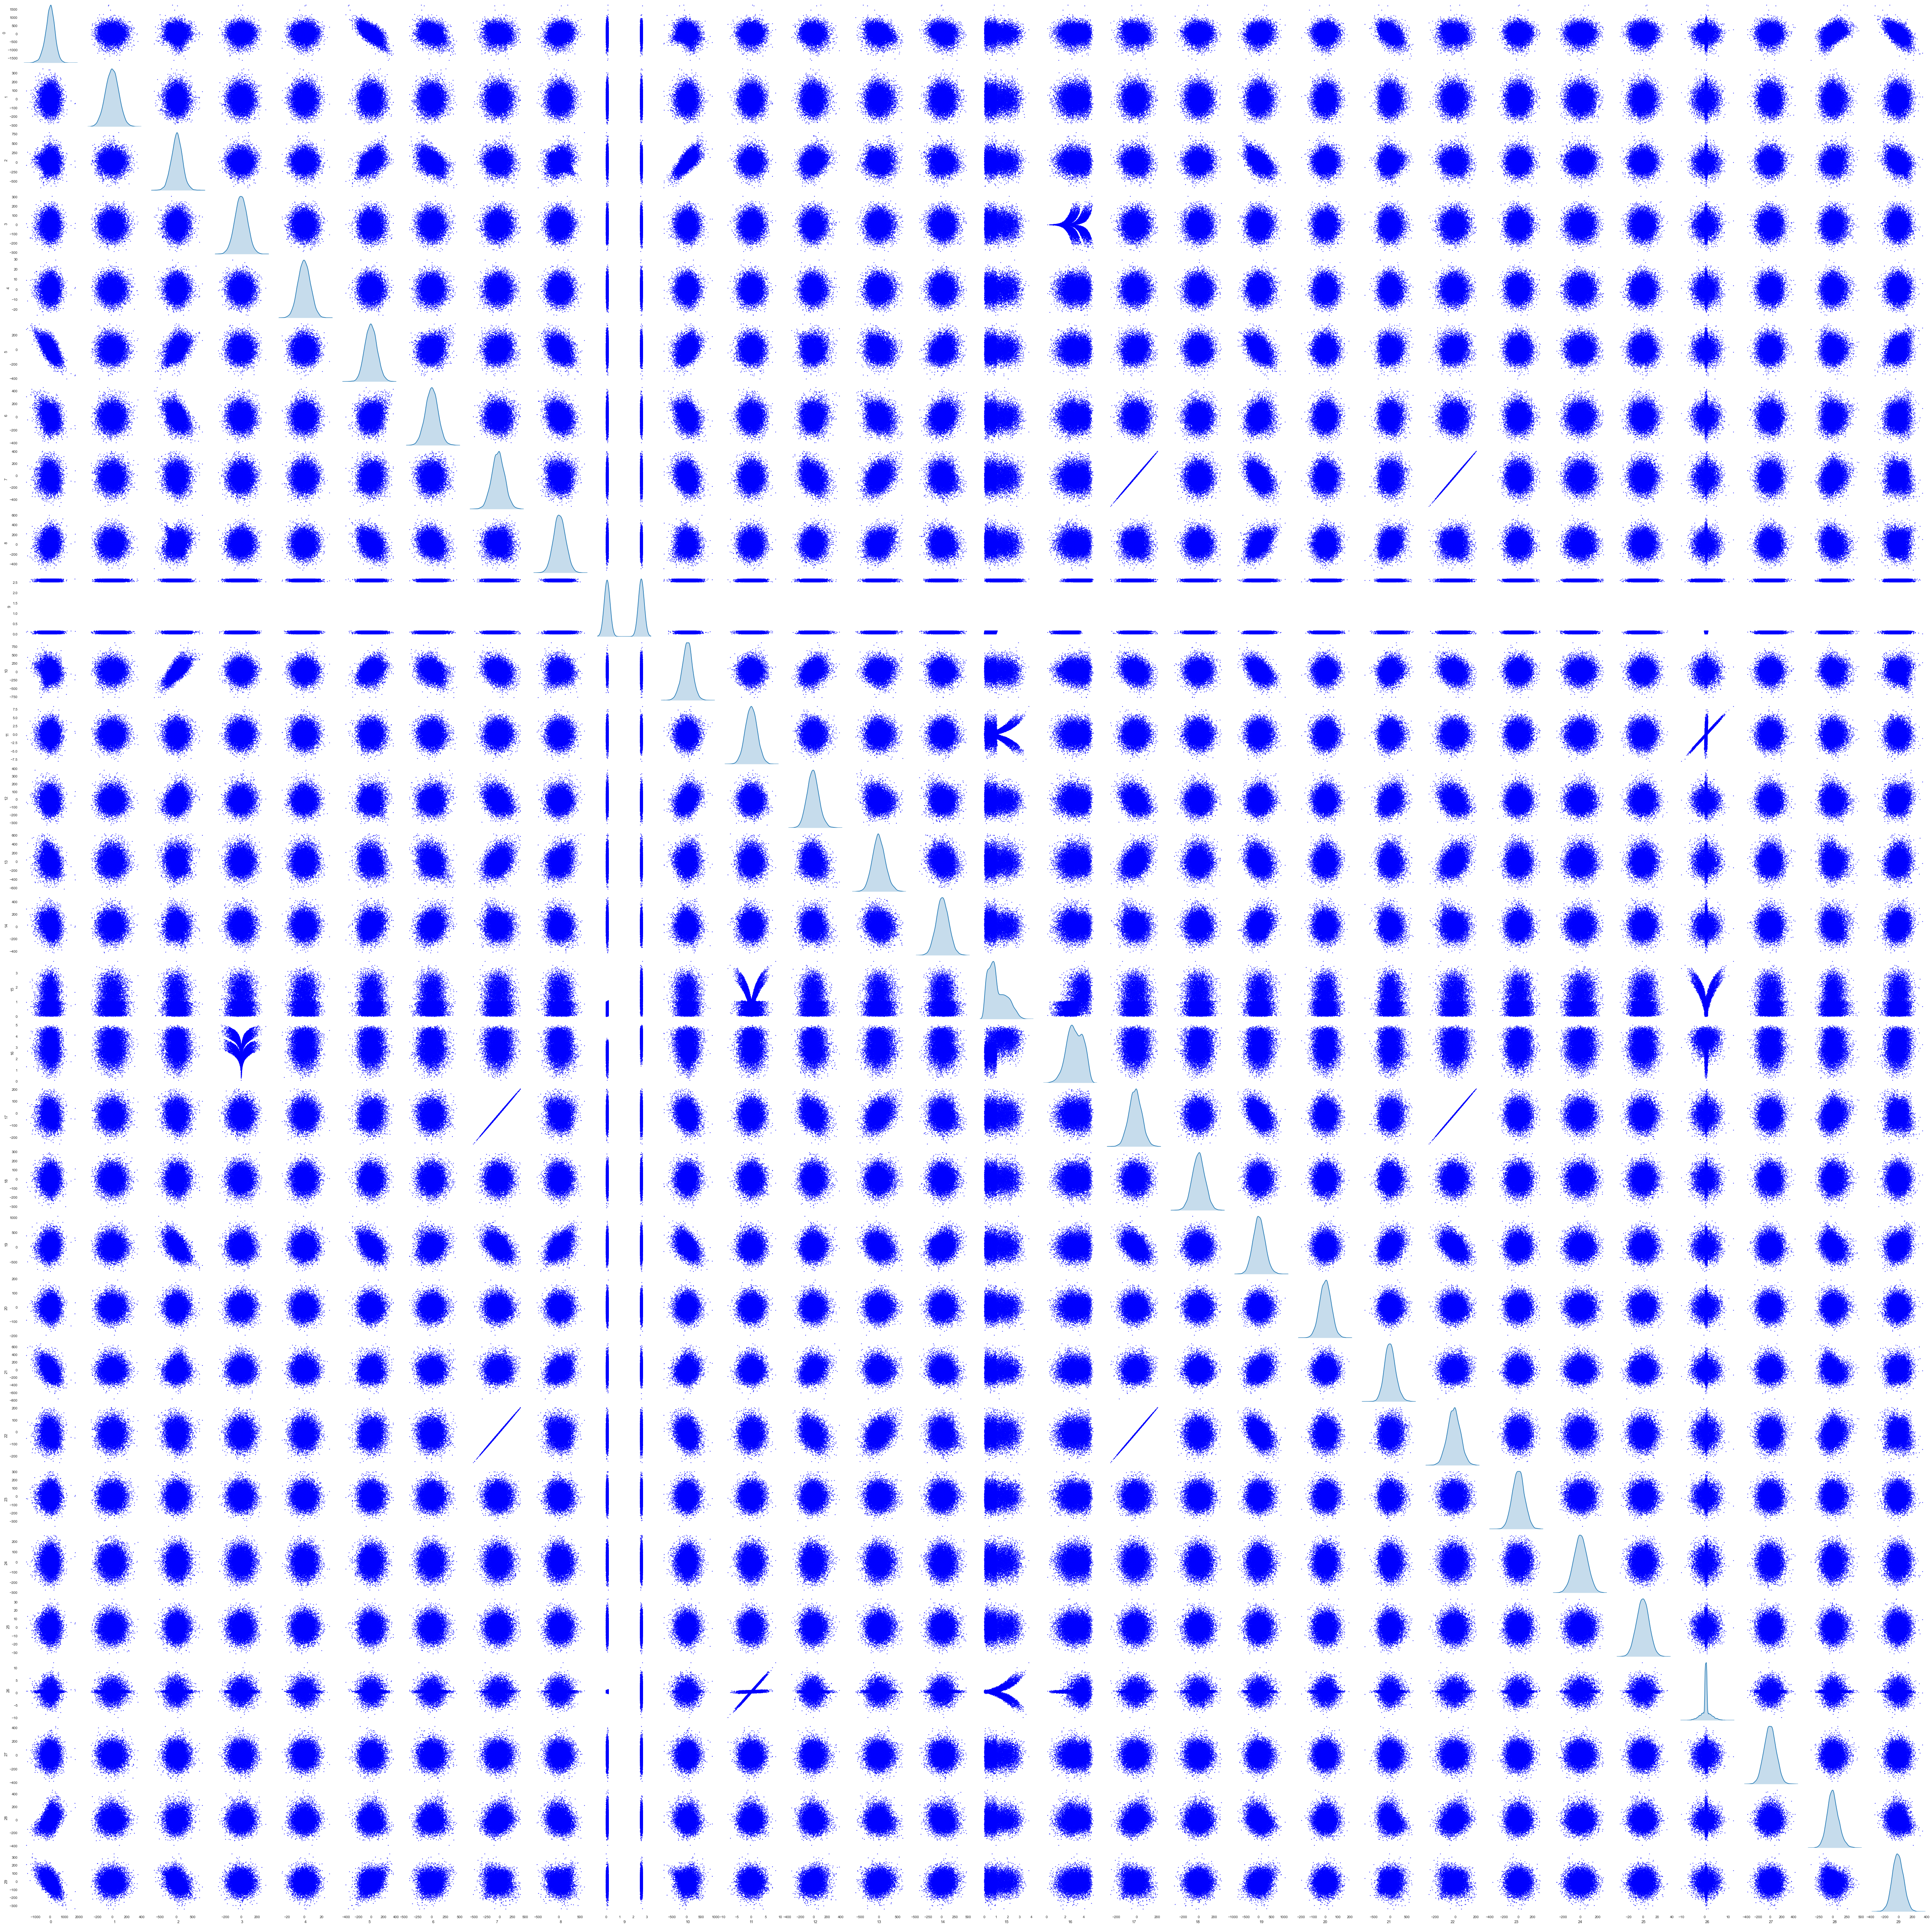

In [16]:
sns.pairplot(datasetN,diag_kind="kde", markers=".", plot_kws=dict(s=5, edgecolor="b", linewidth=1), diag_kws=dict(shade=True))

In [54]:
data = datasetN
data['30'] = y
datacorr = data.corr()
for i in range(0, 30):
    j = 0
    while j < i:
        #print("i = ", i, "j = ", j)
        #print(datacorr.iloc[0,0])
        if(abs(datacorr.iloc[i,j]) > 0.95):
            #c = c + 1
            #"data: ",round(datacorr[i][j],3),
            print("Corr > 0.95 Collumn = ", i+1, "Row = ", j+1)
        if(abs(datacorr.iloc[i,j]) > 0.8 and abs(datacorr.iloc[i,j]) <= 0.95):
            print("Corr > 0.8  Collumn = ", i+1, "Row = ", j+1)
        if(abs(datacorr.iloc[i,j]) > 0.7 and abs(datacorr.iloc[i,j]) <= 0.8):
            print("Corr > 0.7  Collumn = ", i+1, "Row = ", j+1)
        if(abs(datacorr.iloc[i,j]) > 0.6 and abs(datacorr.iloc[i,j]) <= 0.7):
            print("Corr > 0.6  Collumn = ", i+1, "Row = ", j+1)
        if(abs(datacorr.iloc[i,j]) > 0.5 and abs(datacorr.iloc[i,j]) <= 0.6):
            print("Corr > 0.5  Collumn = ", i+1, "Row = ", j+1)
        if(abs(datacorr.iloc[i,j]) > 0.4 and abs(datacorr.iloc[i,j]) <= 0.5):
            print("Corr > 0.4  Collumn = ", i+1, "Row = ", j+1)    
        j = j + 1


Corr > 0.6  Collumn =  6 Row =  1
Corr > 0.4  Collumn =  6 Row =  3
Corr > 0.7  Collumn =  11 Row =  3
Corr > 0.7  Collumn =  16 Row =  10
Corr > 0.7  Collumn =  17 Row =  10
Corr > 0.5  Collumn =  17 Row =  16
Corr > 0.95 Collumn =  18 Row =  8
Corr > 0.5  Collumn =  20 Row =  3
Corr > 0.4  Collumn =  20 Row =  6
Corr > 0.4  Collumn =  20 Row =  8
Corr > 0.4  Collumn =  20 Row =  9
Corr > 0.4  Collumn =  20 Row =  11
Corr > 0.4  Collumn =  20 Row =  18
Corr > 0.4  Collumn =  22 Row =  1
Corr > 0.95 Collumn =  23 Row =  8
Corr > 0.95 Collumn =  23 Row =  18
Corr > 0.4  Collumn =  23 Row =  20
Corr > 0.7  Collumn =  27 Row =  12
Corr > 0.4  Collumn =  29 Row =  1
Corr > 0.6  Collumn =  30 Row =  1


# Удаляем выбросы из наблюдений

Удаляем значения, которые превышают +- 3 сигма

In [64]:
for i in range(0,30):
    data = datasetN[str(i)]
    sigma = (data.to_numpy()).std()
    mean = data.mean()
    index = datasetN.index[datasetN[str(i)] > (3*sigma + mean)].tolist()
    #print(datasetN.index[datasetN[str(i)] > (2*sigma + mean)].tolist())
    datasetN = datasetN.drop(index)
    y = y.drop(index)
for i in range(0,30):
    data = datasetN[str(i)]
    sigma = (data.to_numpy()).std()
    mean = data.mean()
    index = datasetN.index[datasetN[str(i)] < (3*sigma + mean)].tolist()
    #print(datasetN.index[datasetN[str(i)] > (2*sigma + mean)].tolist())
    datasetN = datasetN.drop(index)
    y = y.drop(index)
print("Проверяем, совпадают ли размерности обучающей выборки и целевой переменной: ", len(y)==len(datasetN))

Проверяем, совпадают ли размерности обучающей выборки и целевой переменной:  True


# Удаление лишних переменных

Удаляем одну из объясняющих переменных, парный коэффициент корреляции между которыми больше, чем 0.7. Также исключаем переменные, распределение которых отличалось в обучающей и тестовой выборках.

In [69]:
datasetN = datasetN.drop(['0','1','3','4','5','6','9','11','15','16','17',
                        '18','19','20','22','23','24','25','26','27'], axis=1)
test = test.drop(['0','1','3','4','5','6','9','11','15','16','17',
                        '18','19','20','22','23','24','25','26','27'], axis=1)

# Проверяем качество модели с помощью R^2 и разбитой на несколько частей тренировочной выборки

Model name:  XGBClassifier , score =  0.944625
Model name:  XGBClassifier , score =  0.95325
Model name:  XGBClassifier , score =  0.944875
Model name:  XGBClassifier , score =  0.94775
Model name:  XGBClassifier , score =  0.94525


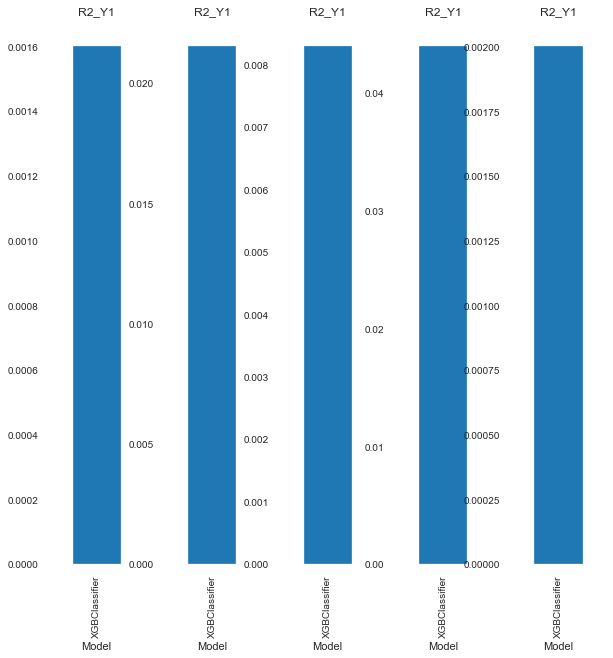

In [70]:
models = [xgboost.XGBClassifier()]
countSub = -1
k_fold = KFold(n_splits=5, shuffle=True)
#создаем временные структуры

fig, axes = plt.subplots(ncols=5, figsize=(10,10))
for train_index, test_index in k_fold.split(y):
    TestModels = DataFrame()
    tmp = {}
    countSub = countSub + 1
    X_train, X_test = datasetN.iloc[train_index], datasetN.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #для каждой модели из списка
    for model in models:
        #print(model.get_params)
        #получаем имя модели
        m = str(model)
        tmp['Model'] = m[:m.index('(')]    
        #обучаем модель
        model.fit(X_train, y_train.values.ravel())
        #вычисляем коэффициент детерминации
        tmp['R2_Y1'] = abs(r2_score(y_test, model.predict(X_test)))
        #записываем данные и итоговый DataFrame
        TestModels = TestModels.append([tmp])
        print("Model name: ", tmp['Model'], ", score = ", model.score(X_train, y_train))
    #делаем индекс по названию модели
    TestModels.set_index('Model', inplace=True)
    TestModels.R2_Y1.plot(ax=axes[countSub], kind='bar', title='R2_Y1')
plt.show()

# Обучаем модель

In [8]:
model = models[0]
scaler = StandardScaler()
scaler.fit_transform(datasetN)
model.fit(datasetN, y.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Записываем предсказания обученной модели в файл

In [72]:
f = open("result_new.txt", 'w')
predictions = model.predict_proba(test)
print(predictions)
#print(model)

for i in range(0,2000):
    f.write('%.10f' % predictions[i][1])
    f.write('\n')
f.close()

[[0.99117094 0.00882903]
 [0.5552842  0.4447158 ]
 [0.74735266 0.25264734]
 ...
 [0.9190099  0.08099005]
 [0.733636   0.26636398]
 [0.03555763 0.9644424 ]]
